# **What is AutoML?**

AutoML, short for Automated Machine Learning, is a set of techniques and tools that automate the process of applying machine learning to real-world problems. AutoML aims to make machine learning more accessible to individuals and organizations by automating the complex tasks involved in building and deploying machine learning models.

The typical machine learning workflow involves several steps, including data preprocessing, feature engineering, model selection, hyperparameter tuning, and model evaluation. These tasks often require significant expertise and manual effort from data scientists and machine learning engineers.

AutoML systems automate these tasks by leveraging techniques such as algorithm selection, hyperparameter optimization, and neural architecture search. They explore a large space of possible models and configurations to find the best-performing model for a given dataset and prediction task.

AutoML platforms may vary in their capabilities and implementation, but they generally offer functionalities such as:

1. **Data preprocessing:** Automatically handling missing values, feature scaling, and categorical encoding to prepare the data for modeling.
  
2. **Feature engineering:** Automatically generating or selecting relevant features from the raw data.
  
3. **Model selection:** Automatically choosing the most suitable machine learning algorithm or model architecture for the problem at hand.
  
4. **Hyperparameter optimization:** Automatically tuning the hyperparameters of the selected model to improve performance.
  
5. **Ensemble methods:** Combining multiple models to improve predictive performance.
  
6. **Model evaluation:** Automatically assessing the performance of the trained models using appropriate evaluation metrics.
  
7. **Deployment:** Facilitating the deployment of trained models into production environments for making predictions on new data.

AutoML democratizes machine learning by enabling domain experts without extensive machine learning expertise to leverage the power of machine learning for their applications. It also helps experienced data scientists and machine learning engineers streamline their workflow, allowing them to focus on higher-level tasks such as problem formulation and interpretation of results.

# **Installing Packages**

In [115]:
!pip install requests
!pip install tabulate
!pip install "colorama>=0.3.8"
!pip install future

# **Installing H2O**

In [151]:
!pip install h2o
!pip install -f http://h2o-release.s3.amazonaws.com/h2o/latest_stable_Py.html h2o

Looking in links: http://h2o-release.s3.amazonaws.com/h2o/latest_stable_Py.html


# **Importing the Libraries**

In [117]:
import h2o
from h2o.automl import H2OAutoML
import random, os, sys
from datetime import datetime
import pandas as pd
import plotly.express as px
import logging
import csv
import optparse
import time
import json
from distutils.util import strtobool
import psutil
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
sns.set(context="notebook", palette="Spectral", style = 'darkgrid' ,font_scale = 1.5, color_codes=True)
import warnings
warnings.filterwarnings('ignore')
import os
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.compat import lzip
import statsmodels.stats.api as sms
from sklearn.model_selection import train_test_split as tts
from statsmodels.stats.outliers_influence import variance_inflation_factor
import numpy as np
from sklearn.preprocessing import LabelEncoder
from tabulate import tabulate
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LassoCV
from sklearn.linear_model import RidgeCV
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error
from yellowbrick.regressor import ResidualsPlot
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV

# **Exploratory Data Analysis**

In [119]:
df = pd.read_csv('https://raw.githubusercontent.com/sakshiraade/Data-Science-Engineering-Methods-and-Tools/main/pizza_sales.csv')

In [120]:
# Create label encoders
label_encoder_name = LabelEncoder()
label_encoder_size = LabelEncoder()

# Fit and transform the label encoders for 'pizza_name' and 'pizza_size'
df['pizza_name'] = label_encoder_name.fit_transform(df['pizza_name'])
df['pizza_size'] = label_encoder_size.fit_transform(df['pizza_size'])
df['pizza_name_id'] = df['pizza_name'] * 100 + df['pizza_size']
df['order_date'] = pd.to_datetime(df['order_date'], errors='coerce', dayfirst=True)
df['order_time'] = pd.to_datetime(df['order_time'], format='%H:%M:%S').dt.strftime('%H')
df['order_date'] = df['order_date'].dt.day_name()
ingredient_freq = df['pizza_ingredients'].value_counts().to_dict()
df['pizza_ingredients'] = df['pizza_ingredients'].map(ingredient_freq)
label_encoder = LabelEncoder()
df['pizza_category'] = label_encoder.fit_transform(df['pizza_category'])
df['order_date'] = label_encoder.fit_transform(df['order_date'])
df.head()

,pizza_id,order_id,pizza_name_id,quantity,order_date,order_time,unit_price,total_price,pizza_size,pizza_category,pizza_ingredients,pizza_name
0,1.0,1.0,1201,1.0,4,11,13.25,13.25,1,1,2370,12
1,2.0,2.0,701,1.0,4,11,16.00,16.00,1,1,2416,7
2,3.0,2.0,800,1.0,4,11,18.50,18.50,0,3,1359,8
3,4.0,2.0,1400,1.0,4,11,20.75,20.75,0,2,1849,14
4,5.0,2.0,1701,1.0,4,11,16.00,16.00,1,3,1456,17


In [121]:
df['order_time'] = df['order_time'].astype(int)

In [122]:
df.dtypes

pizza_id             float64
order_id             float64
pizza_name_id          int64
quantity             float64
order_date             int64
order_time             int64
unit_price           float64
total_price          float64
pizza_size             int64
pizza_category         int64
pizza_ingredients      int64
pizza_name             int64
dtype: object

In [123]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48620 entries, 0 to 48619
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   pizza_id           48620 non-null  float64
 1   order_id           48620 non-null  float64
 2   pizza_name_id      48620 non-null  int64  
 3   quantity           48620 non-null  float64
 4   order_date         48620 non-null  int64  
 5   order_time         48620 non-null  int64  
 6   unit_price         48620 non-null  float64
 7   total_price        48620 non-null  float64
 8   pizza_size         48620 non-null  int64  
 9   pizza_category     48620 non-null  int64  
 10  pizza_ingredients  48620 non-null  int64  
 11  pizza_name         48620 non-null  int64  
dtypes: float64(5), int64(7)
memory usage: 4.5 MB


In [124]:
df.isnull().sum()

pizza_id             0
order_id             0
pizza_name_id        0
quantity             0
order_date           0
order_time           0
unit_price           0
total_price          0
pizza_size           0
pizza_category       0
pizza_ingredients    0
pizza_name           0
dtype: int64

In [125]:
df.shape

(48620, 12)

In [126]:
columns = list(df.columns)
print(columns)

['pizza_id', 'order_id', 'pizza_name_id', 'quantity', 'order_date', 'order_time', 'unit_price', 'total_price', 'pizza_size', 'pizza_category', 'pizza_ingredients', 'pizza_name']


In [127]:
df.drop(['order_id', 'pizza_id'], axis=1, inplace=True)

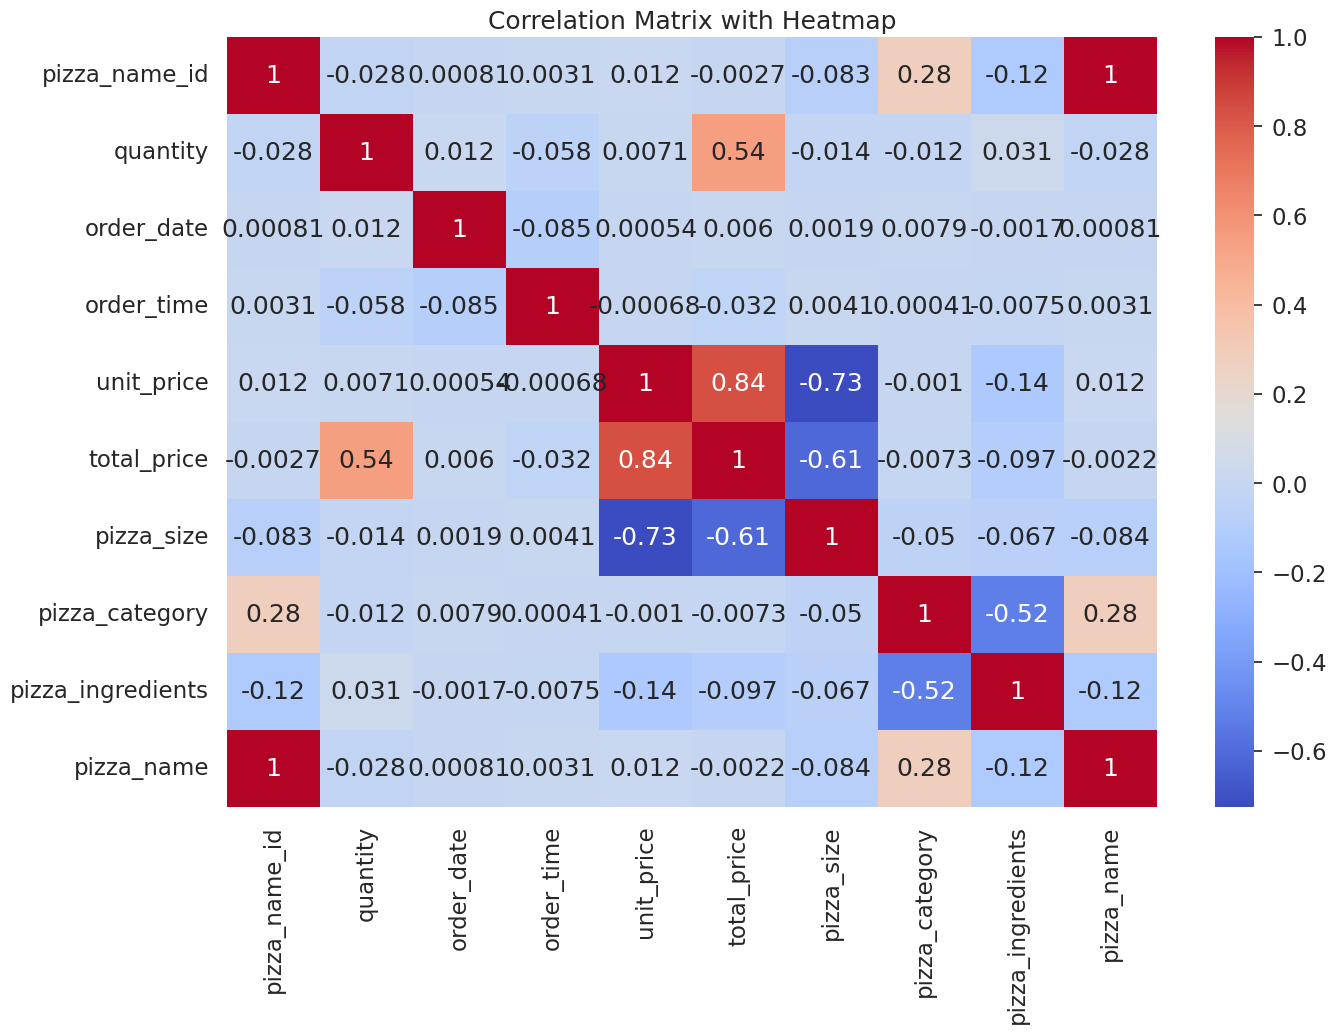

In [157]:
# Calculate the correlation matrix
correlation_matrix = df.corr()

# Plot the heatmap
plt.figure(figsize=(15, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title("Correlation Matrix with Heatmap")
plt.show()

# **OLS Regression Result**

In [129]:
# Using OLS for finding the p value to check the significant features
import statsmodels.api as sm

model = sm.OLS(
    df["total_price"],
    df[
        [
            "pizza_name_id",
            "quantity",
            "order_date",
            "order_time",
            "unit_price",
            "pizza_size",
            "pizza_category",
            "pizza_ingredients",
            "pizza_name",
        ]
    ],
).fit()

# Print out the statistics
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:            total_price   R-squared (uncentered):                   0.995
Model:                            OLS   Adj. R-squared (uncentered):              0.995
Method:                 Least Squares   F-statistic:                          1.159e+06
Date:                Tue, 20 Feb 2024   Prob (F-statistic):                        0.00
Time:                        01:48:16   Log-Likelihood:                         -80089.
No. Observations:               48620   AIC:                                  1.602e+05
Df Residuals:                   48612   BIC:                                  1.603e+05
Df Model:                           8                                                  
Covariance Type:            nonrobust                                                  
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
pizza_name_id        -0.0003   6.38e-06    -46.189      0.000      -0.000      -0.000
quantity             12.6479      0.035    364.731      0.000      12.580      12.716
order_date           -0.0691      0.003    -24.738      0.000      -0.075      -0.064
order_time           -0.1390      0.002    -82.639      0.000      -0.142      -0.136
unit_price            0.6760      0.002    383.855      0.000       0.673       0.679
pizza_size           -1.2867      0.008   -155.500      0.000      -1.303      -1.270
pizza_category       -0.4865      0.006    -79.741      0.000      -0.499      -0.475
pizza_ingredients    -0.0015   1.17e-05   -128.261      0.000      -0.002      -0.001
pizza_name            0.0129   8.27e-05    155.480      0.000       0.013       0.013
==============================================================================
Omnibus:                    37801.104   Durbin-Watson:                   1.774
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          1480339.274
Skew:                           3.413   Prob(JB):                         0.00
Kurtosis:                      29.156   Cond. No.                     2.77e+17
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The smallest eigenvalue is 3.69e-24. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

# **H20 AutoML Execution**

In [130]:
# Set up AutoML
aml = H2OAutoML(max_runtime_secs=run_time, seed=1)

In [118]:
port_no=random.randint(5555,55555)

#  h2o.init(strict_version_check=False,min_mem_size_GB=min_mem_size,port=port_no) # start h2o
try:
  h2o.init(strict_version_check=False,min_mem_size_GB=min_mem_size,port=port_no) # start h2o
except:
  logging.critical('h2o.init')
  h2o.download_all_logs(dirname=logs_path, filename=logfile)
  h2o.cluster().shutdown()
  sys.exit(2)

Checking whether there is an H2O instance running at http://localhost:26371..... not found.
Attempting to start a local H2O server...
  Java Version: openjdk version "11.0.21" 2023-10-17; OpenJDK Runtime Environment (build 11.0.21+9-post-Ubuntu-0ubuntu122.04); OpenJDK 64-Bit Server VM (build 11.0.21+9-post-Ubuntu-0ubuntu122.04, mixed mode, sharing)
  Starting server from /usr/local/lib/python3.10/dist-packages/h2o/backend/bin/h2o.jar
  Ice root: /tmp/tmpmbwvqpi1
  JVM stdout: /tmp/tmpmbwvqpi1/h2o_unknownUser_started_from_python.out
  JVM stderr: /tmp/tmpmbwvqpi1/h2o_unknownUser_started_from_python.err
  Server is running at http://127.0.0.1:26371
Connecting to H2O server at http://127.0.0.1:26371 ... successful.


H2O_cluster_uptime:,07 secs
H2O_cluster_timezone:,Etc/UTC
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.44.0.3
H2O_cluster_version_age:,1 month and 30 days
H2O_cluster_name:,H2O_from_python_unknownUser_1sfp18
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,5 Gb
H2O_cluster_total_cores:,2
H2O_cluster_allowed_cores:,2
H2O_cluster_status:,"locked, healthy"


In [131]:
h2o.init()

Checking whether there is an H2O instance running at http://localhost:54321. connected.


H2O_cluster_uptime:,43 mins 11 secs
H2O_cluster_timezone:,Etc/UTC
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.44.0.3
H2O_cluster_version_age:,1 month and 30 days
H2O_cluster_name:,H2O_from_python_unknownUser_xj3xet
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,3.045 Gb
H2O_cluster_total_cores:,2
H2O_cluster_allowed_cores:,2
H2O_cluster_status:,"locked, healthy"


In [132]:
data = h2o.H2OFrame(df)

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%


In [133]:
data.describe(chunk_summary=True)

Rows:48620
Cols:10

Chunk compression summary: 
chunk_type    chunk_name                 count    count_percentage    size      size_percentage
------------  -------------------------  -------  ------------------  --------  -----------------
C1N           1-Byte Integers (w/o NAs)  6        60                  285.3 KB  42.8722
C2            2-Byte Integers            2        20                  190.1 KB  28.5615
C2S           2-Byte Fractions           2        20                  190.1 KB  28.5662

Frame distribution summary: 
                 size      number_of_rows    number_of_chunks_per_column    number_of_chunks
---------------  --------  ----------------  -----------------------------  ------------------
127.0.0.1:54321  665.4 KB  48620             1                              10
mean             665.4 KB  48620             1                              10
min              665.4 KB  48620             1                              10
max              665.4 KB  48620             1                              10
stddev           0  B      0                 0                              0
total            665.4 KB  48620             1                              10

,pizza_name_id,quantity,order_date,order_time,unit_price,total_price,pizza_size,pizza_category,pizza_ingredients,pizza_name
type,int,int,int,int,real,real,int,int,int,int
mins,0.0,1.0,0.0,9.0,9.75,9.75,0.0,0.0,480.0,0.0
mean,1552.2439942410474,1.0196215549156642,2.9343685726038458,15.911805841217559,16.494132044425967,16.82147367338538,0.9338338132455783,1.4907445495680738,1704.1092554504385,15.51310160427802
maxs,3102.0,4.0,6.0,23.0,35.95,83.0,4.0,3.0,2416.0,31.0
sigma,932.9470489957058,0.14307700932472173,2.033692479505859,3.149836090733785,3.621789158657547,4.437397581181115,0.8469810004831723,1.0797108029426314,517.7571334125616,9.330178767818236
zeros,967,0,8106,0,0,0,18526,10815,0,2372
missing,0,0,0,0,0,0,0,0,0,0
0,1201.0,1.0,4.0,11.0,13.25,13.25,1.0,1.0,2370.0,12.0
1,701.0,1.0,4.0,11.0,16.0,16.0,1.0,1.0,2416.0,7.0
2,800.0,1.0,4.0,11.0,18.5,18.5,0.0,3.0,1359.0,8.0


In [134]:
df_train, df_test = data.split_frame(ratios=[0.8], seed = 1)

In [135]:
print(df_train.shape)
print(df_test.shape)

(38945, 10)
(9675, 10)


In [136]:
X = data.columns
print(X)
# Set target and predictor variables
y1 = "total_price"
X.remove(y1)  # Removing the result frm our predictors data
print(X)

['pizza_name_id', 'quantity', 'order_date', 'order_time', 'unit_price', 'total_price', 'pizza_size', 'pizza_category', 'pizza_ingredients', 'pizza_name']
['pizza_name_id', 'quantity', 'order_date', 'order_time', 'unit_price', 'pizza_size', 'pizza_category', 'pizza_ingredients', 'pizza_name']


In [137]:
min_mem_size=6
run_time=222
pct_memory=0.5
virtual_memory=psutil.virtual_memory()
min_mem_size=int(round(int(pct_memory*virtual_memory.available)/1073741824,0))
print(min_mem_size)

4


In [138]:
#pass the data through H20AutoML
aml.train(x=X,y=y1,training_frame=df_train)

AutoML progress: |███████████████████████████████████████████████████████████████| (done) 100%


key,value
Stacking strategy,cross_validation
Number of base models (used / total),4/12
# GBM base models (used / total),0/5
# XGBoost base models (used / total),2/3
# DeepLearning base models (used / total),1/1
# DRF base models (used / total),0/2
# GLM base models (used / total),1/1
Metalearner algorithm,GLM
Metalearner fold assignment scheme,Random
Metalearner nfolds,5


In [139]:
print(aml.leaderboard)

model_id                                                    rmse        mse        mae       rmsle    mean_residual_deviance
StackedEnsemble_AllModels_2_AutoML_4_20240220_14820     0.160521  0.0257671  0.0128903  0.00316435                 0.0257671
StackedEnsemble_BestOfFamily_3_AutoML_4_20240220_14820  0.160776  0.0258488  0.0114031  0.00317384                 0.0258488
XGBoost_2_AutoML_4_20240220_14820                       0.160809  0.0258595  0.0100951  0.00318045                 0.0258595
StackedEnsemble_AllModels_1_AutoML_4_20240220_14820     0.161034  0.0259318  0.0113928  0.00318254                 0.0259318
StackedEnsemble_BestOfFamily_2_AutoML_4_20240220_14820  0.161556  0.0261003  0.0117253  0.00319763                 0.0261003
XGBoost_3_AutoML_4_20240220_14820                       0.225835  0.0510012  0.084781   0.00665782                 0.0510012
GBM_2_AutoML_4_20240220_14820                           0.234187  0.0548434  0.0442472  0.00519075                 0.0548434


Based on the leaderboard provided, the models are organized in descending order of their RMSE scores, where lower scores indicate superior predictive performance. The top-ranked model, "StackedEnsemble_AllModels_2_AutoML_4_20240220_14820," achieves the best performance with the lowest RMSE score of 0.160521.

Following closely is the model "StackedEnsemble_BestOfFamily_3_AutoML_4_20240220_14820" with an RMSE score of 0.160776, positioning it as the second-best performing model on the leaderboard.

As the evaluation metrics suggest, these top-performing models can be considered for further analysis or deployment, as they demonstrate strong predictive capabilities with low RMSE scores. Conversely, models ranking lower on the leaderboard, such as "DRF_1_AutoML_4_20240220_14820" with an RMSE score of 0.271596, may require additional scrutiny or refinement to improve their predictive accuracy.

In conclusion, the leaderboard provides valuable insights into the relative performance of different models, assisting in the selection of the most suitable model for the specific use case based on its RMSE score.

In [140]:
model_index = 0
glm_index = 0
glm_model = ""
aml_leaderboard_df = aml.leaderboard.as_data_frame()
models_dict = {}
for m in aml_leaderboard_df["model_id"]:
    models_dict[m] = model_index
    if "StackedEnsemble" not in m:
        break
    model_index = model_index + 1

for m in aml_leaderboard_df["model_id"]:
    if "GLM" in m:
        models_dict[m] = glm_index
        break
    glm_index = glm_index + 1
models_dict

Export File progress: |██████████████████████████████████████████████████████████| (done) 100%


{'StackedEnsemble_AllModels_2_AutoML_4_20240220_14820': 0,
 'StackedEnsemble_BestOfFamily_3_AutoML_4_20240220_14820': 1,
 'XGBoost_2_AutoML_4_20240220_14820': 2,
 'GLM_1_AutoML_4_20240220_14820': 14}

In [141]:
print(model_index)
best_model = h2o.get_model(aml.leaderboard[model_index, "model_id"])

2


In [142]:
best_model.algo

'xgboost'

In [143]:
print(best_model.rmse(train=True))

0.1064208354982116


# **Regularization**

In this section, we'll utilize the GLM model to assess the impact of regularization on improving accuracy and mitigating overfitting.

Ridge and Lasso are regularization techniques employed in linear regression to combat overfitting and enhance the model's generalization capability.

Ridge regularization supplements a penalty term to the least-squares objective function of the linear regression model. This extra term is proportionate to the square of the coefficients' magnitude, effectively pulling them towards zero. The regularization's intensity is determined by a hyperparameter known as the regularization parameter, which requires fine-tuning for optimal performance. Ridge regularization proves beneficial when dealing with numerous input variables that are correlated, as it can mitigate the model's variance by dampening the impact of these correlated variables.

Lasso regularization bears resemblance to Ridge regularization, but instead of imposing a penalty proportional to the square of the coefficients, it applies a penalty proportional to the absolute value of the coefficients. This penalty can nullify some coefficients, making Lasso regularization adept at feature selection. By zeroing out certain coefficients, Lasso effectively removes irrelevant variables from the model, resulting in a simpler and more interpretable model.

The primary disparity between Ridge and Lasso regularization lies in the type of penalty function employed. Ridge utilizes L2 regularization, while Lasso employs L1 regularization. L2 regularization spreads the penalty uniformly across all coefficients, whereas L1 regularization concentrates the penalty on a smaller subset of the most influential coefficients. The choice between the two methods hinges on the specific problem and the characteristics of the input variables.

In [144]:
from h2o.estimators.glm import H2OGeneralizedLinearEstimator

pizza_glm = H2OGeneralizedLinearEstimator(
    family="gaussian", lambda_=0, compute_p_values=True, nfolds=5
)  # Elastic Net Regularization
pizza_glm_regularization_ridge = H2OGeneralizedLinearEstimator(
    family="gaussian", alpha=0, nfolds=5
)  # RIDGE Regularization
pizza_glm_regularization_lasso = H2OGeneralizedLinearEstimator(
    family="gaussian", alpha=1, nfolds=5
)  # LASSO Regularization
pizza_glm_regularization_lamba_search = H2OGeneralizedLinearEstimator(
    lambda_search=True
)  # Lambda Search

This code constructs two generalized linear regression models utilizing the H2O machine learning platform, employing different regularization techniques: Ridge and Lasso.

The initial model, "pizza_glm_regularization_ridge," utilizes Ridge regularization. The "family" parameter is configured as "gaussian," indicating a continuous response variable and normal (Gaussian) error distribution. The "alpha" parameter is set to 0, implying Ridge regularization. Additionally, the "nfolds" parameter is specified as 5, indicating 5-fold cross-validation for model performance evaluation.

The subsequent model, "pizza_glm_regularization_lasso," employs Lasso regularization. While the "family" and "nfolds" parameters remain consistent with the Ridge model, the "alpha" parameter is adjusted to 1, indicating Lasso regularization.

This code establishes a generalized linear regression model using H2O, offering the option to conduct a lambda search for both L1 and L2 regularization.

In [145]:
# Assuming 'df_train' is your H2OFrame object
# Convert H2OFrame to pandas DataFrame
df_train_pd = train.as_data_frame()

# Identify and remove collinear columns
correlation_matrix = df_train_pd.corr().abs()
collinear_features = set()
for i in range(len(correlation_matrix.columns)):
    for j in range(i):
        if abs(correlation_matrix.iloc[i, j]) > 0.8:  # Set your threshold here
            colname = correlation_matrix.columns[i]
            collinear_features.add(colname)
df_train_pd = df_train_pd.drop(columns=collinear_features)

# Convert the processed pandas DataFrame back to H2OFrame
df_train_processed = h2o.H2OFrame(df_train_pd)

# Define predictor variables (X) and target variable (y)
X = df_train_processed.columns[:-1]  # All columns except the last one
y = df_train_processed.columns[6]  # Assuming the 6th column is the target variable 'total_price'

# Train your GLM model
pizza_glm = H2OGeneralizedLinearEstimator()
pizza_glm.train(x=X, y=y, training_frame=df_train_processed)

Export File progress: |██████████████████████████████████████████████████████████| (done) 100%
Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
glm Model Build progress: |██████████████████████████████████████████████████████| (done) 100%


Model Details
=============
H2OGeneralizedLinearEstimator : Generalized Linear Modeling
Model Key: GLM_model_python_1708391101228_46


GLM Model: summary
    family    link      regularization                                 number_of_predictors_total    number_of_active_predictors    number_of_iterations    training_frame
--  --------  --------  ---------------------------------------------  ----------------------------  -----------------------------  ----------------------  ------------------------------------------------------
    gaussian  identity  Elastic Net (alpha = 0.5, lambda = 5.966E-4 )  6                             6                              1                       Key_Frame__upload_98b4d6f02e3713e8c66afe07874948f1.hex

ModelMetricsRegressionGLM: glm
** Reported on train data. **

MSE: 1.0737943745050418
RMSE: 1.036240500320771
MAE: 0.8593207676030993
RMSLE: 0.4892491545407528
Mean Residual Deviance: 1.0737943745050418
R^2: 0.07828394347976941
Null degrees of freedom: 38944
Residual degrees of freedom: 38938
Null deviance: 45370.720862765644
Residual deviance: 41818.92191509885
AIC: 113309.94871761926

Scoring History: 
    timestamp            duration    iterations    negative_log_likelihood    objective           training_rmse      training_deviance    training_mae        training_r2
--  -------------------  ----------  ------------  -------------------------  ------------------  -----------------  -------------------  ------------------  -------------------
    2024-02-20 01:52:06  0.000 sec   0             45370.7208627529           1.1649947583194993
    2024-02-20 01:52:06  0.083 sec   1                                                            1.036240500320771  1.0737943745050418   0.8593207676030993  0.07828394347976941

Variable Importances: 
variable       relative_importance    scaled_importance    percentage
-------------  ---------------------  -------------------  ------------
pizza_name_id  0.292808               1                    0.681603
pizza_size     0.0649317              0.221755             0.151149
unit_price     0.0506733              0.17306              0.117958
order_date     0.0102981              0.0351702            0.0239721
quantity       0.0060833              0.0207757            0.0141608
order_time     0.0047932              0.0163698            0.0111577

[tips]
Use `model.explain()` to inspect the model.
--
Use `h2o.display.toggle_user_tips()` to switch on/off this section.


# **Ridge Regularization**

In [146]:
pizza_glm_regularization_ridge.train(x=X, y=y, training_frame=df_train)

glm Model Build progress: |██████████████████████████████████████████████████████| (done) 100%


,family,link,regularization,number_of_predictors_total,number_of_active_predictors,number_of_iterations,training_frame
,gaussian,identity,Ridge ( lambda = 2.983E-4 ),6,6,1,py_244_sid_9ff0
,mean,sd,cv_1_valid,cv_2_valid,cv_3_valid,cv_4_valid,cv_5_valid
mae,0.8594913,0.0106172,0.8618788,0.8731669,0.8645859,0.8468630,0.8509619
mean_residual_deviance,1.0741566,0.0212548,1.0805662,1.0983105,1.0879476,1.0540676,1.0498911
mse,1.0741566,0.0212548,1.0805662,1.0983105,1.0879476,1.0540676,1.0498911
null_deviance,9074.786,110.93194,9191.898,9122.93,9145.099,8972.83,8941.176
r2,0.0779408,0.0083414,0.0797602,0.0732368,0.0682564,0.0778967,0.0905538
residual_deviance,8366.331,162.28734,8457.592,8454.794,8520.806,8268.105,8130.357
rmse,1.0363746,0.0102617,1.0395029,1.0480031,1.0430473,1.026678,1.024642
rmsle,0.4892850,0.0048470,0.4892334,0.4953459,0.4909105,0.4890349,0.4819004


# **Lasso Regularization**

In [147]:
pizza_glm_regularization_lasso.train(x=X, y=y, training_frame=df_train)

glm Model Build progress: |██████████████████████████████████████████████████████| (done) 100%


,family,link,regularization,number_of_predictors_total,number_of_active_predictors,number_of_iterations,training_frame
,gaussian,identity,Lasso (lambda = 2.983E-4 ),6,6,1,py_244_sid_9ff0
,mean,sd,cv_1_valid,cv_2_valid,cv_3_valid,cv_4_valid,cv_5_valid
mae,0.8595144,0.0030382,0.8589789,0.8597316,0.8564481,0.8579312,0.8644823
mean_residual_deviance,1.0742241,0.0060064,1.0639331,1.0768366,1.0740342,1.0776154,1.0787009
mse,1.0742241,0.0060064,1.0639331,1.0768366,1.0740342,1.0776154,1.0787009
null_deviance,9074.716,152.62823,9213.586,9175.899,8874.594,8947.95,9161.55
r2,0.0777571,0.0076192,0.0875990,0.0738309,0.0711693,0.0719162,0.0842700
residual_deviance,8366.894,99.79744,8405.072,8498.395,8237.842,8304.1045,8389.058
rmse,1.0364445,0.0029020,1.0314714,1.0377073,1.0363562,1.0380826,1.0386053
rmsle,0.4893324,0.0025901,0.4901223,0.4872530,0.4860444,0.4910733,0.4921688


In [148]:
lambda_search = wine_glm_regularization_lamba_search.train(
    x=X, y=y, training_frame=df_train
)

glm Model Build progress: |██████████████████████████████████████████████████████| (done) 100%


In [149]:
lambda_search

Model Details
=============
H2OGeneralizedLinearEstimator : Generalized Linear Modeling
Model Key: GLM_model_python_1708391101228_49


GLM Model: summary
    family    link      regularization                                 lambda_search                                                                 number_of_predictors_total    number_of_active_predictors    number_of_iterations    training_frame
--  --------  --------  ---------------------------------------------  ----------------------------------------------------------------------------  ----------------------------  -----------------------------  ----------------------  ----------------
    gaussian  identity  Elastic Net (alpha = 0.5, lambda = 0.009952 )  nlambda = 100, lambda.max = 0.5966, lambda.min = 0.009952, lambda.1se = -1.0  6                             5                              45                      py_244_sid_9ff0

ModelMetricsRegressionGLM: glm
** Reported on train data. **

MSE: 1.0740938186253657
RMSE: 1.0363849760708448
MAE: 0.8602146726964768
RMSLE: 0.48949668605434343
Mean Residual Deviance: 1.0740938186253657
R^2: 0.07802690874361673
Null degrees of freedom: 38944
Residual degrees of freedom: 38939
Null deviance: 45370.720862765644
Residual deviance: 41830.58376636486
AIC: 113318.80761742502

Scoring History: 
     timestamp            duration    iteration    lambda    predictors    deviance_train      alpha    iterations    training_rmse       training_deviance    training_mae        training_r2
---  -------------------  ----------  -----------  --------  ------------  ------------------  -------  ------------  ------------------  -------------------  ------------------  -------------------
     2024-02-20 01:52:08  0.000 sec   1            .6E0      1             1.1649947583195577  0.5
     2024-02-20 01:52:08  0.009 sec   2            .54E0     2             1.1529963626738202  0.5
     2024-02-20 01:52:08  0.013 sec   3            .5E0      2             1.1424221114333877  0.5
     2024-02-20 01:52:08  0.016 sec   4            .45E0     2             1.1331424732968711  0.5
     2024-02-20 01:52:08  0.020 sec   5            .41E0     2             1.1250315956867676  0.5
     2024-02-20 01:52:08  0.024 sec   6            .37E0     2             1.1179690801717537  0.5
     2024-02-20 01:52:08  0.027 sec   7            .34E0     2             1.111841297329246   0.5
     2024-02-20 01:52:08  0.031 sec   8            .31E0     2             1.1065422842457127  0.5
     2024-02-20 01:52:08  0.034 sec   9            .28E0     2             1.1019742773342376  0.5
     2024-02-20 01:52:08  0.040 sec   10           .26E0     2             1.09804793754485    0.5
---  ---                  ---         ---          ---       ---           ---                 ---      ---           ---                 ---                  ---                 ---
     2024-02-20 01:52:09  0.152 sec   36           .23E-1    4             1.0751078731054915  0.5
     2024-02-20 01:52:09  0.165 sec   37           .21E-1    4             1.0749199875214581  0.5
     2024-02-20 01:52:09  0.168 sec   38           .19E-1    5             1.0747533255751265  0.5
     2024-02-20 01:52:09  0.172 sec   39           .17E-1    5             1.0746059614350694  0.5
     2024-02-20 01:52:09  0.175 sec   40           .16E-1    5             1.0744826028953296  0.5
     2024-02-20 01:52:09  0.197 sec   41           .14E-1    5             1.074379540305494   0.5
     2024-02-20 01:52:09  0.202 sec   42           .13E-1    5             1.074293480955781   0.5
     2024-02-20 01:52:09  0.206 sec   43           .12E-1    6             1.0742143775701436  0.5
     2024-02-20 01:52:09  0.213 sec   44           .11E-1    6             1.0741490978085317  0.5
     2024-02-20 01:52:09  0.217 sec   45           .1E-1     6             1.0740938186254125  0.5      45            1.0363849760708448  1.0740938186253657   0.8602146726964768  0.07802690874361673
[45 rows x 13 columns]


Variabl

# Leaderboard

> Leaderboard shows models with their metrics. When provided with H2OAutoML object, the leaderboard shows 5-fold cross-validated metrics by default (depending on the H2OAutoML settings), otherwise it shows metrics computed on the frame. At most 20 models are shown by default.

model_id,rmse,mse,mae,rmsle,mean_residual_deviance,training_time_ms,predict_time_per_row_ms,algo
StackedEnsemble_AllModels_2_AutoML_4_20240220_14820,0.132717,0.0176137,0.0125519,0.00330568,0.0176137,726,0.007348,StackedEnsemble
StackedEnsemble_BestOfFamily_2_AutoML_4_20240220_14820,0.13307,0.0177076,0.010371,0.00330572,0.0177076,642,0.011546,StackedEnsemble
StackedEnsemble_AllModels_1_AutoML_4_20240220_14820,0.133134,0.0177247,0.0103207,0.00330632,0.0177247,680,0.016661,StackedEnsemble
StackedEnsemble_BestOfFamily_3_AutoML_4_20240220_14820,0.134015,0.0179601,0.0105854,0.00332549,0.0179601,472,0.011452,StackedEnsemble
XGBoost_2_AutoML_4_20240220_14820,0.135283,0.0183014,0.00987107,0.0033589,0.0183014,1501,0.003586,XGBoost
XGBoost_1_AutoML_4_20240220_14820,0.141214,0.0199414,0.00732267,0.00289514,0.0199414,5781,0.008359,XGBoost
StackedEnsemble_BestOfFamily_1_AutoML_4_20240220_14820,0.151727,0.0230212,0.0344577,0.00392081,0.0230212,514,0.009025,StackedEnsemble
XGBoost_3_AutoML_4_20240220_14820,0.153594,0.0235911,0.0595891,0.00479166,0.0235911,544,0.001641,XGBoost
DRF_1_AutoML_4_20240220_14820,0.194052,0.0376561,0.0144702,0.00437009,0.0376561,1577,0.008783,DRF
GBM_2_AutoML_4_20240220_14820,0.20118,0.0404734,0.0380257,0.00458575,0.0404734,2041,0.011748,GBM


# Residual Analysis

> Residual Analysis plots the fitted values vs residuals on a test dataset. Ideally, residuals should be randomly distributed. Patterns in this plot can indicate potential problems with the model selection, e.g., using simpler model than necessary, not accounting for heteroscedasticity, autocorrelation, etc. Note that if you see "striped" lines of residuals, that is an artifact of having an integer valued (vs a real valued) response variable.

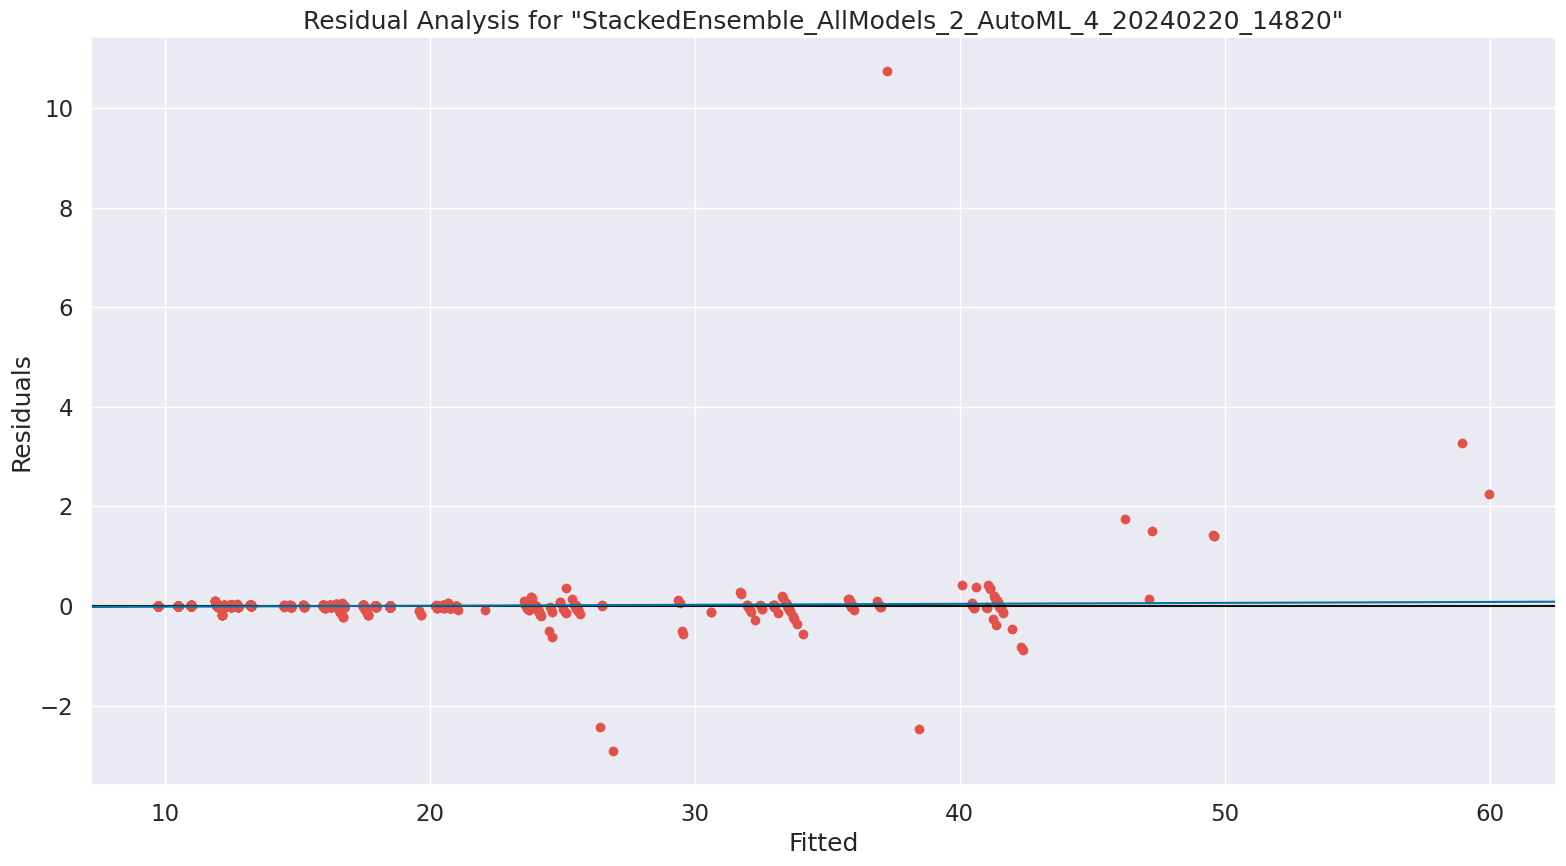

# Learning Curve Plot

> Learning curve plot shows the loss function/metric dependent on number of iterations or trees for tree-based algorithms. This plot can be useful for determining whether the model overfits.

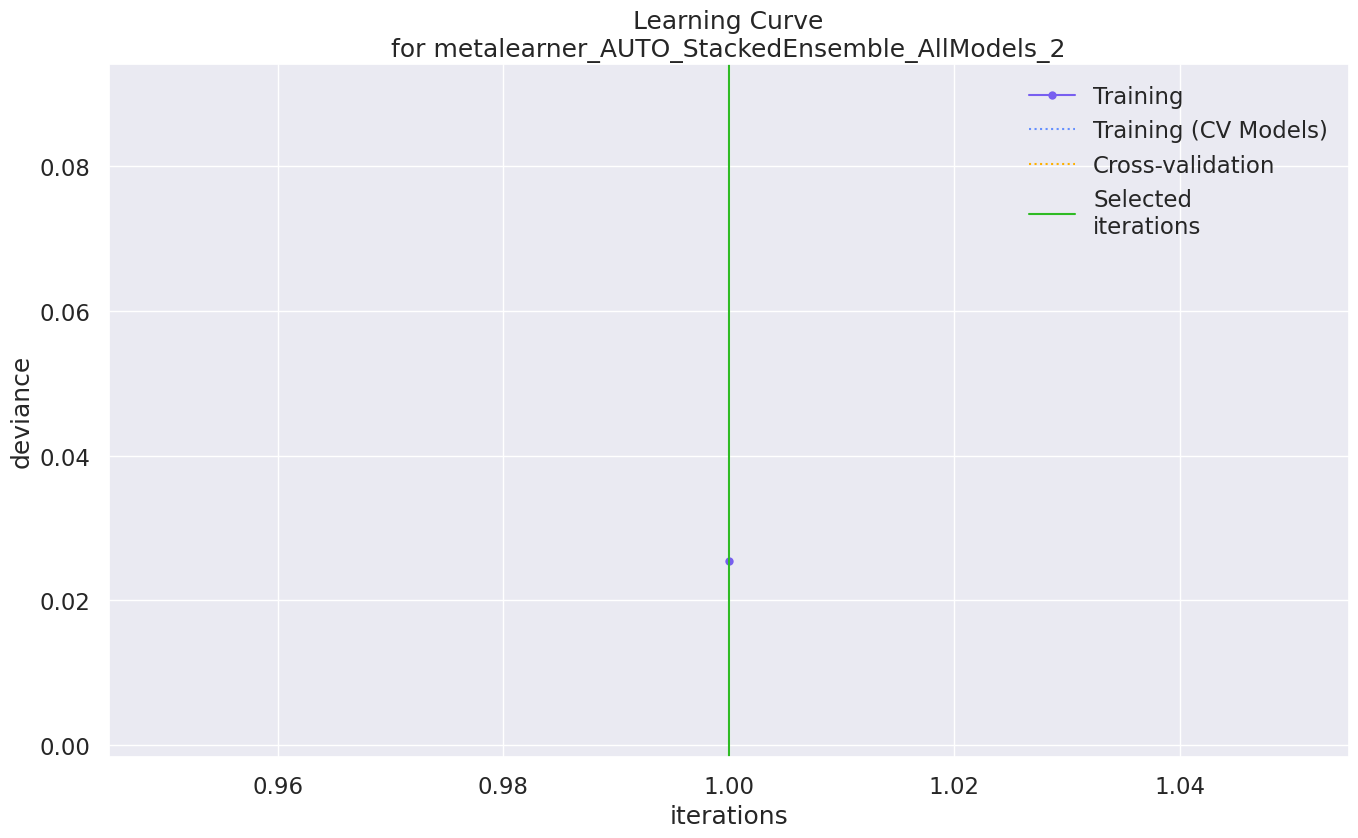

# Variable Importance

> The variable importance plot shows the relative importance of the most important variables in the model.

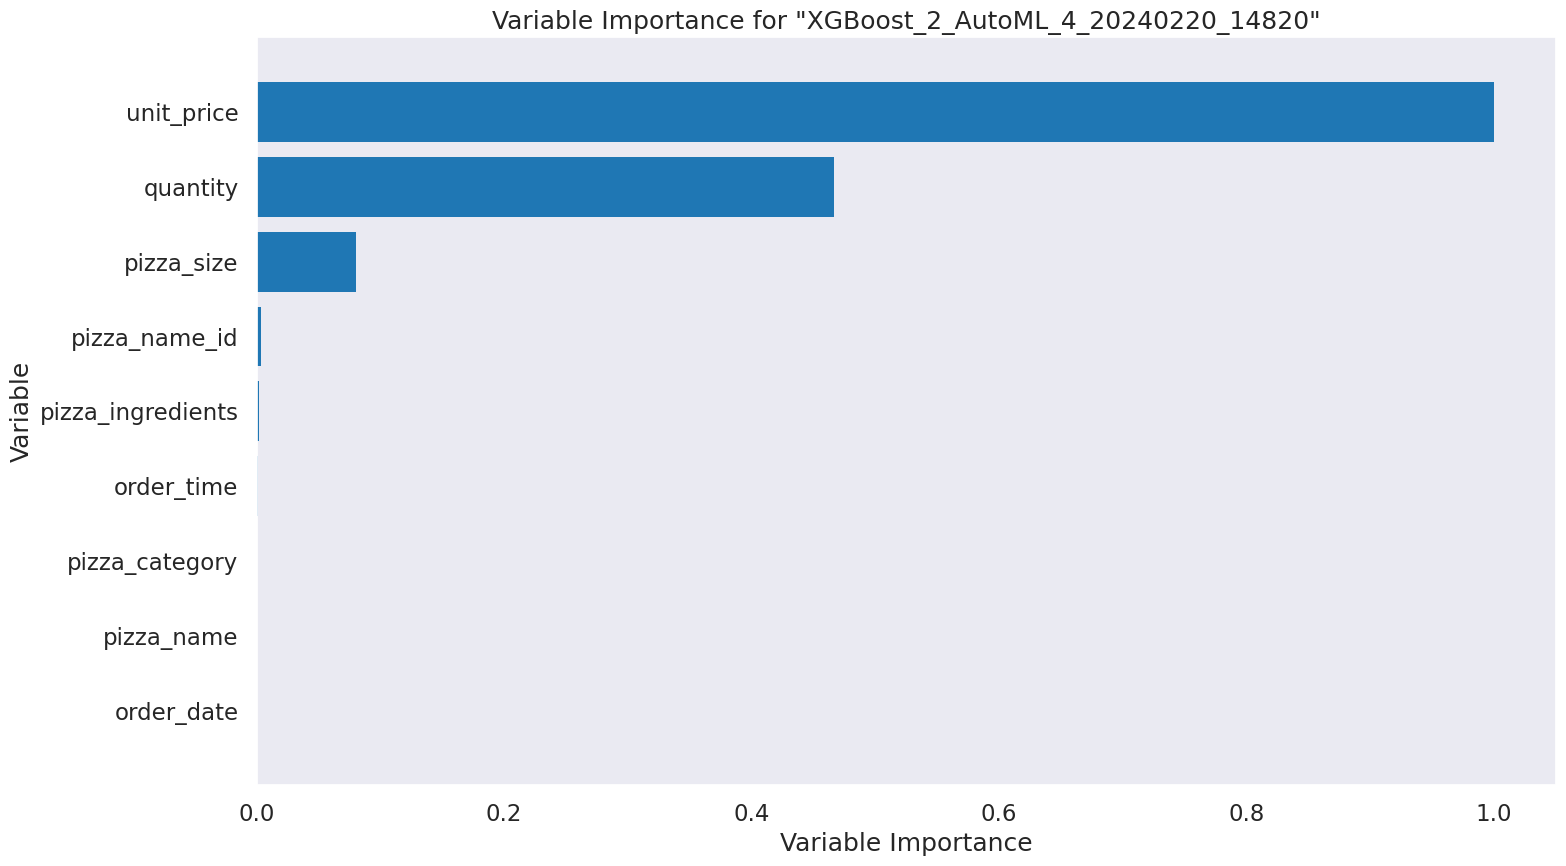

# Variable Importance Heatmap

> Variable importance heatmap shows variable importance across multiple models. Some models in H2O return variable importance for one-hot (binary indicator) encoded versions of categorical columns (e.g. Deep Learning, XGBoost). In order for the variable importance of categorical columns to be compared across all model types we compute a summarization of the the variable importance across all one-hot encoded features and return a single variable importance for the original categorical feature. By default, the models and variables are ordered by their similarity.

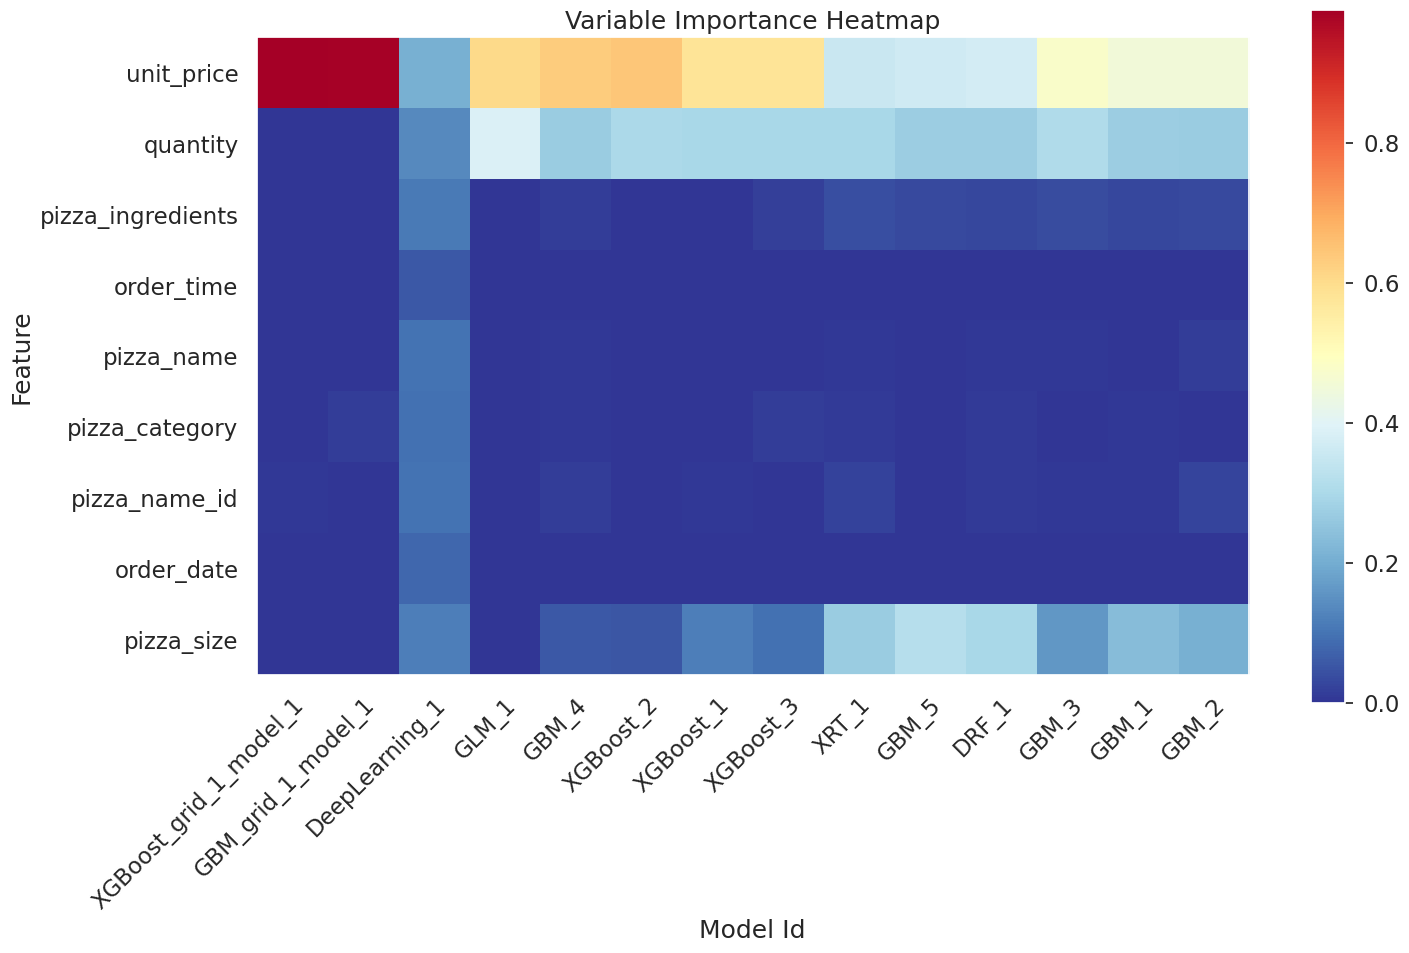

# Model Correlation

> This plot shows the correlation between the predictions of the models. For classification, frequency of identical predictions is used. By default, models are ordered by their similarity (as computed by hierarchical clustering). Interpretable models, such as GAM, GLM, and RuleFit are highlighted using red colored text.

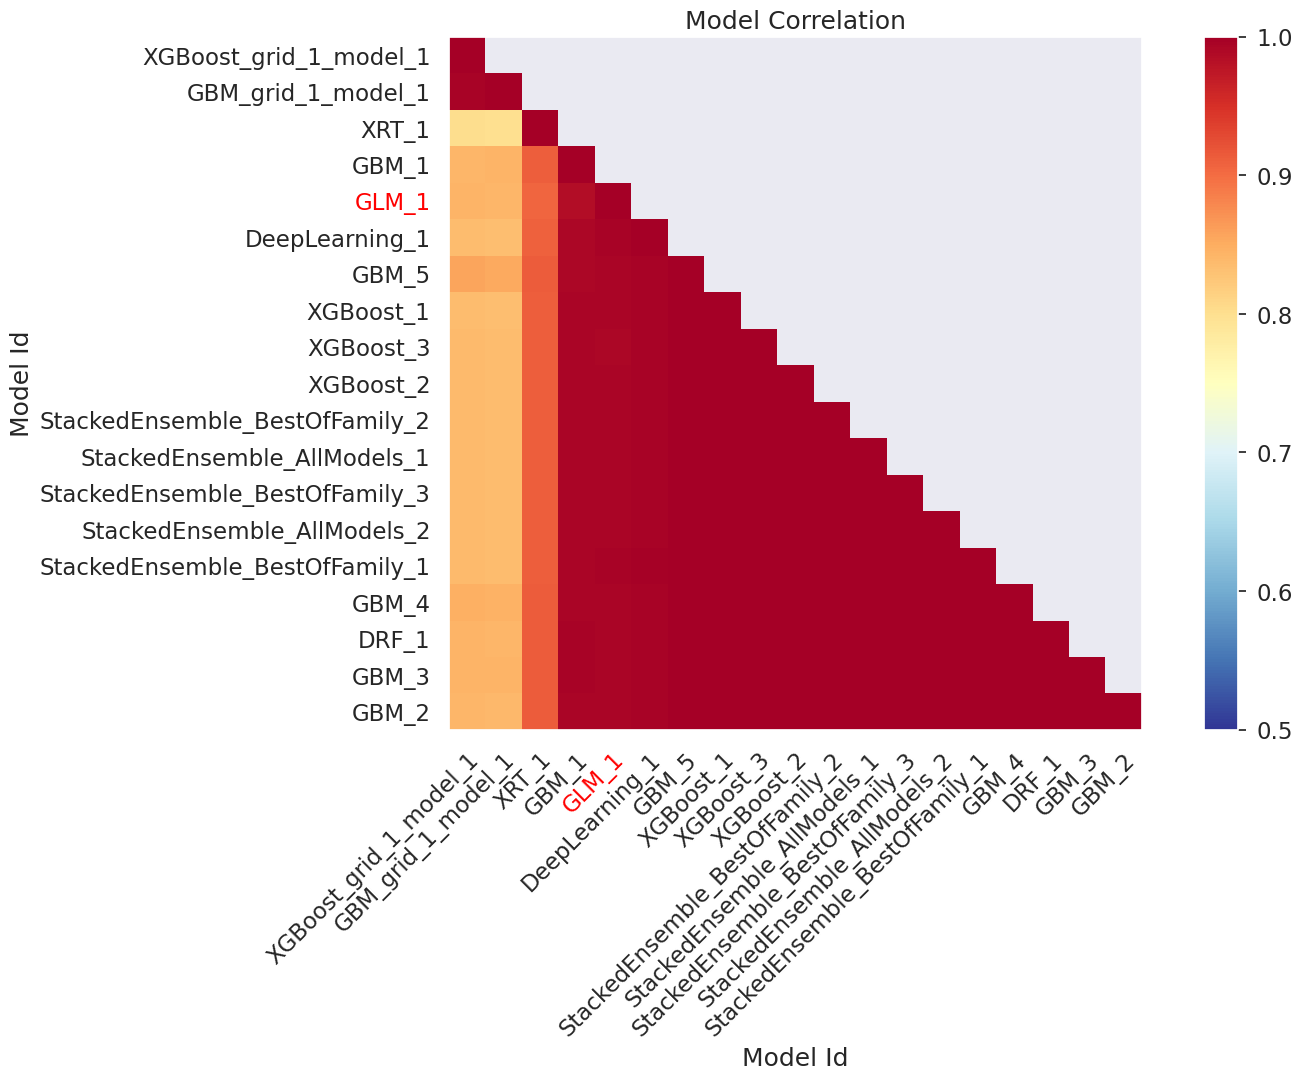

# SHAP Summary

> SHAP summary plot shows the contribution of the features for each instance (row of data). The sum of the feature contributions and the bias term is equal to the raw prediction of the model, i.e., prediction before applying inverse link function.

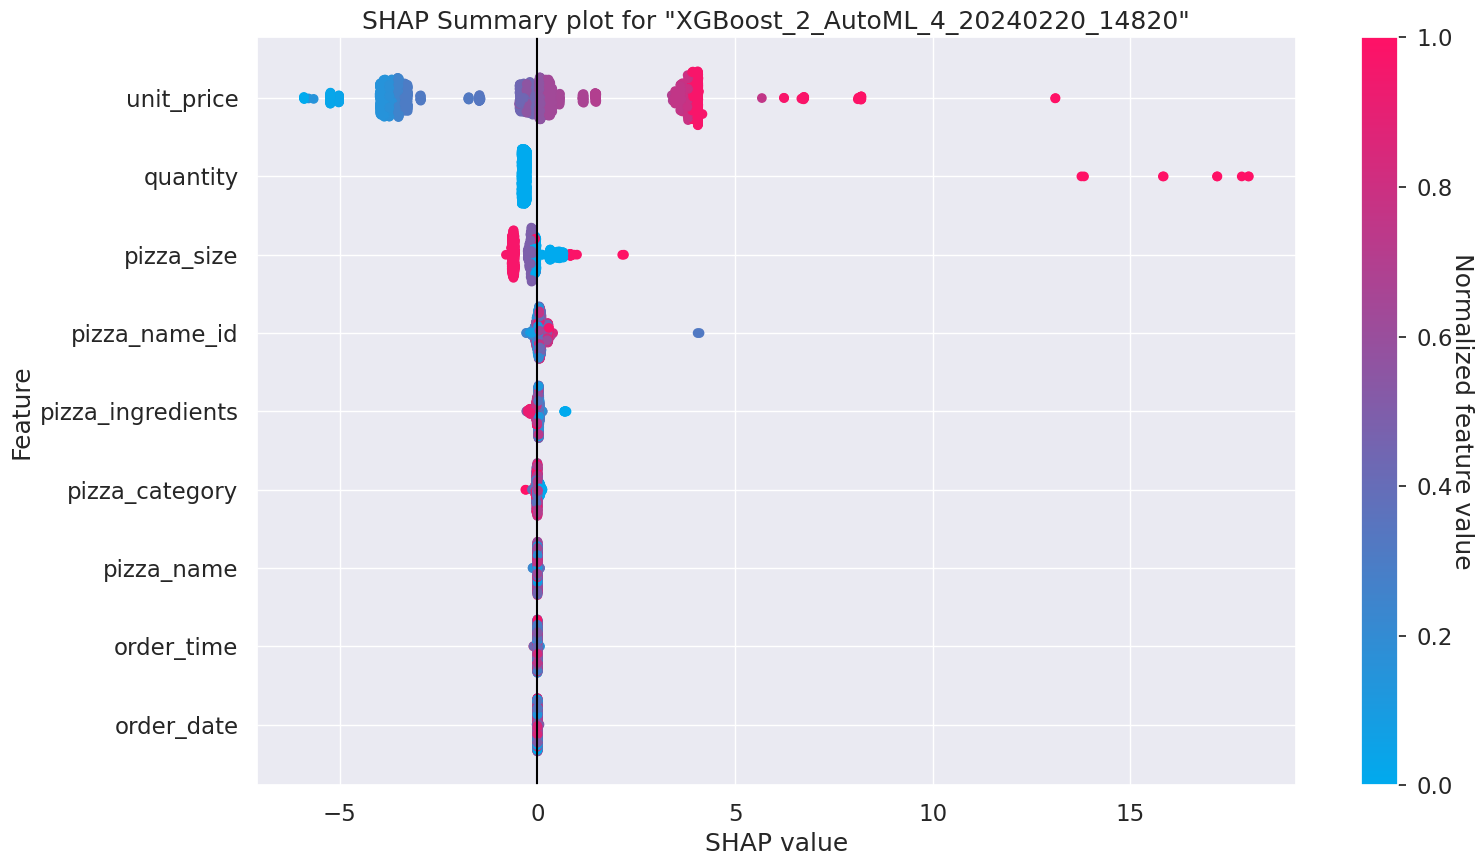

# Partial Dependence Plots

> Partial dependence plot (PDP) gives a graphical depiction of the marginal effect of a variable on the response. The effect of a variable is measured in change in the mean response. PDP assumes independence between the feature for which is the PDP computed and the rest.

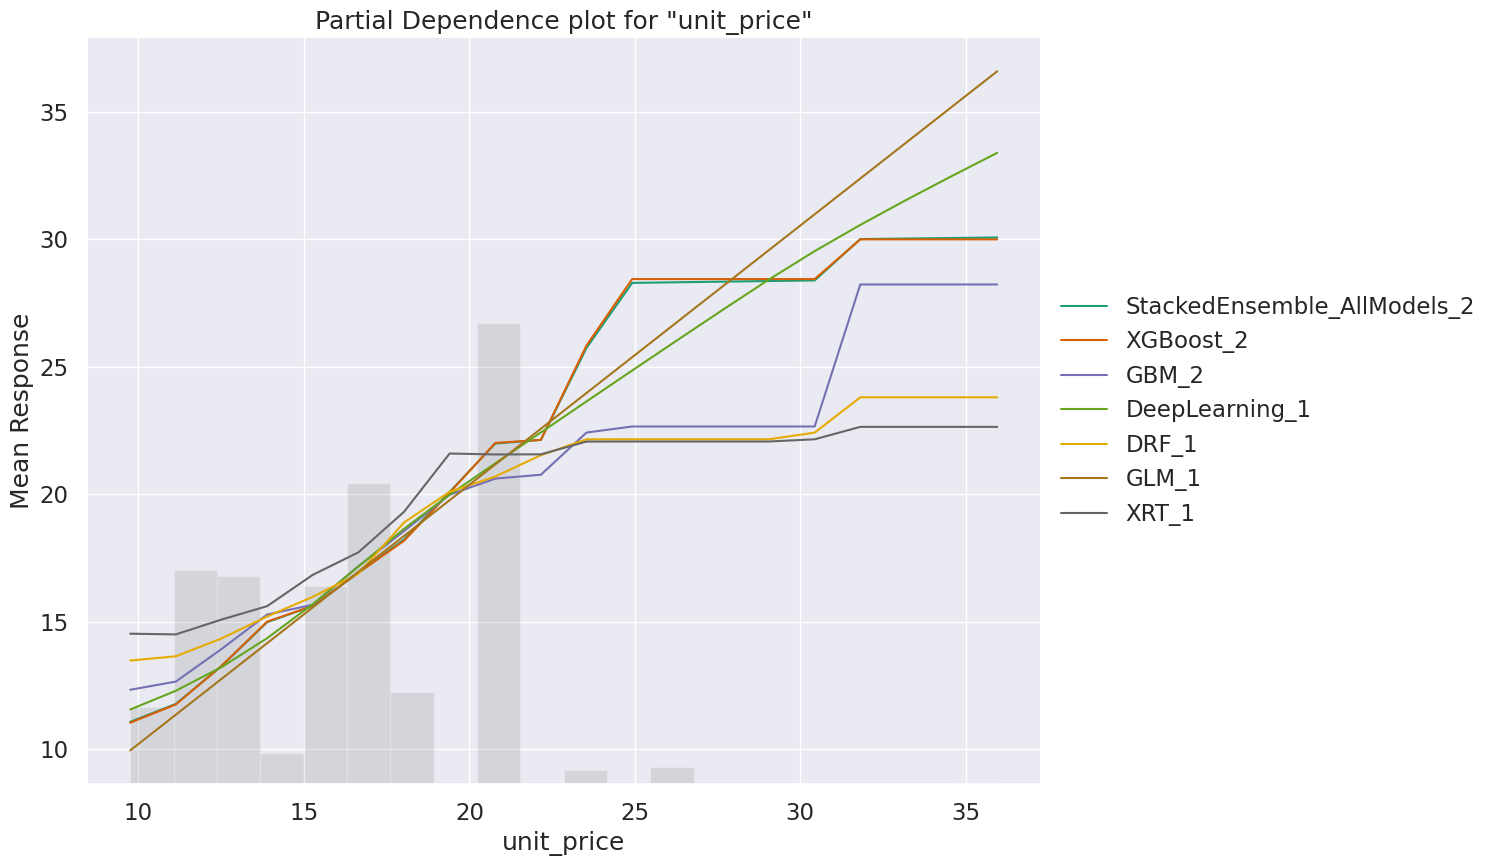

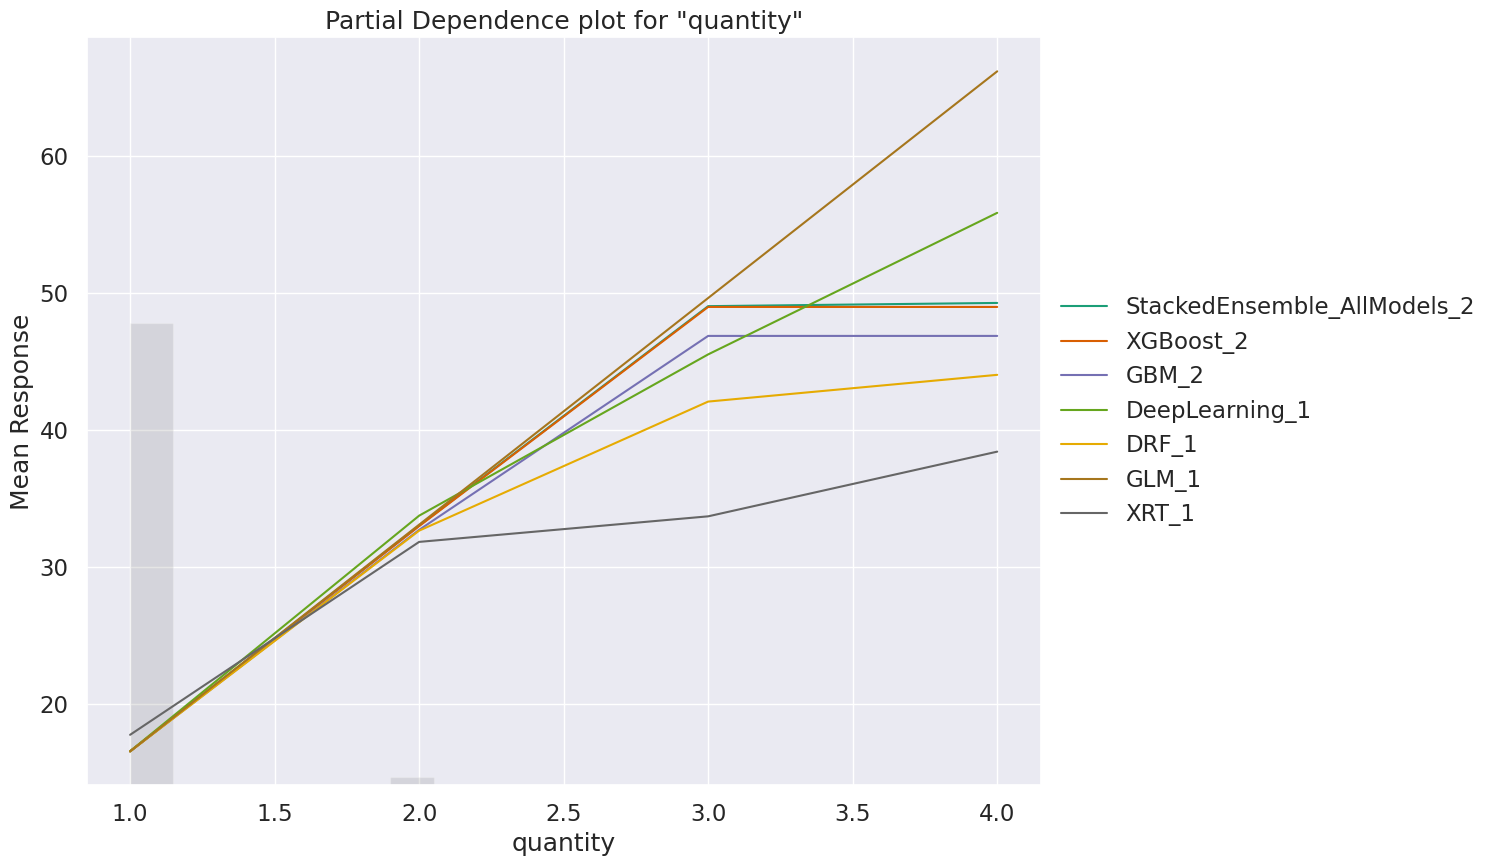

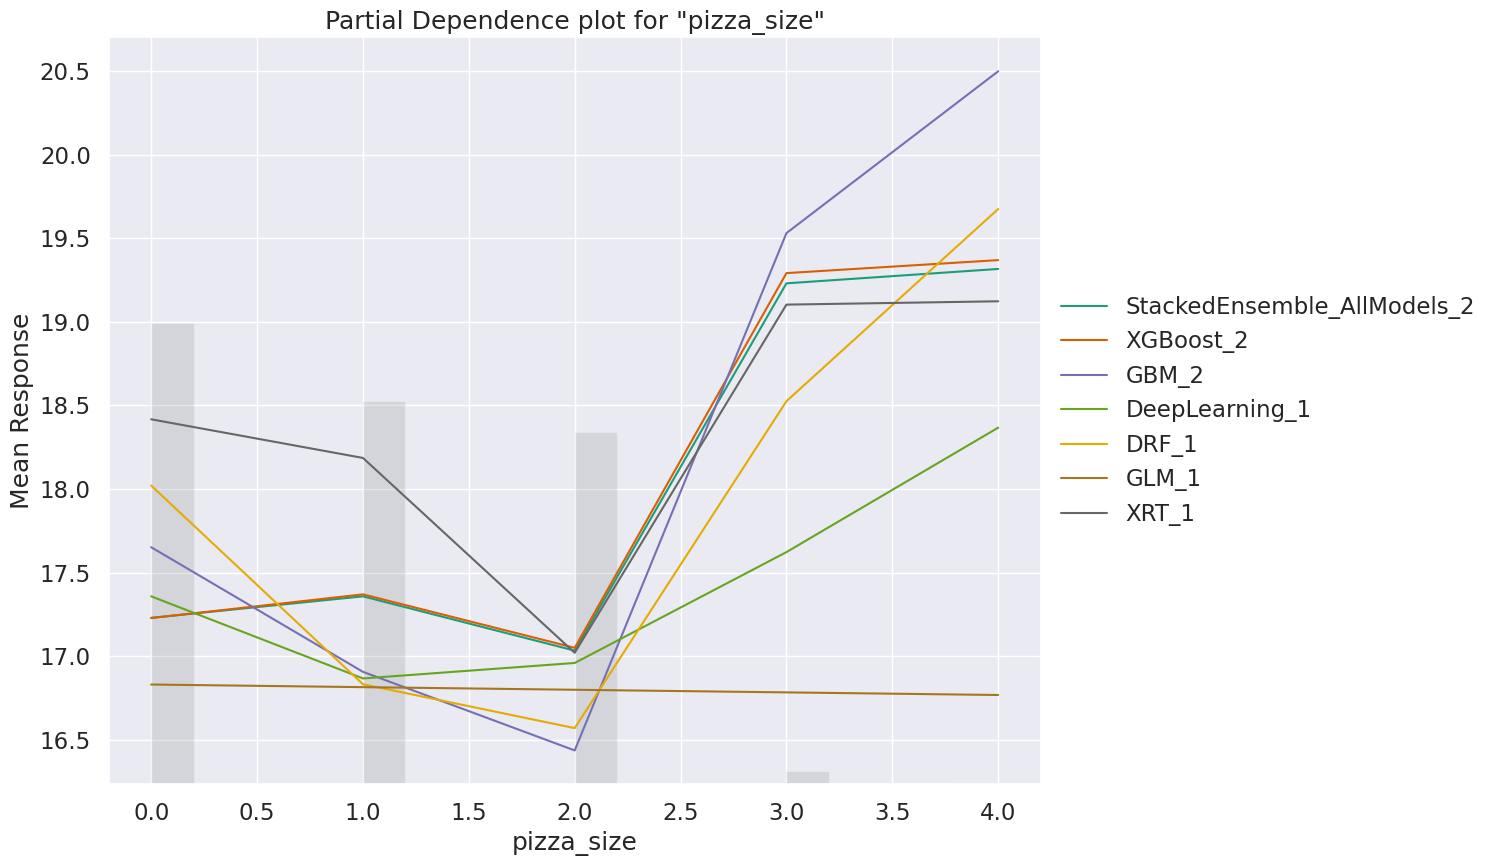

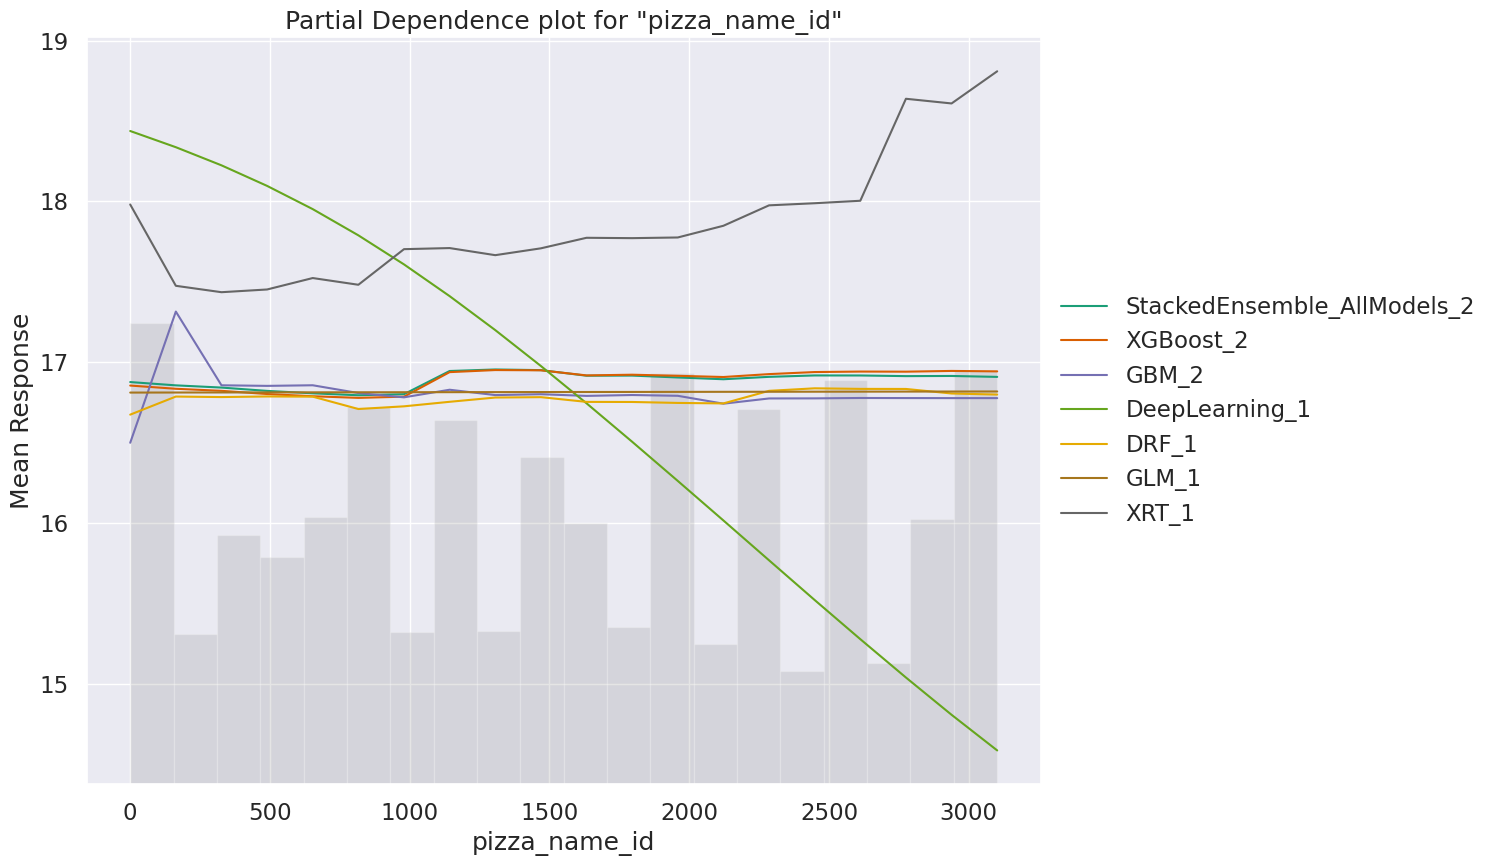

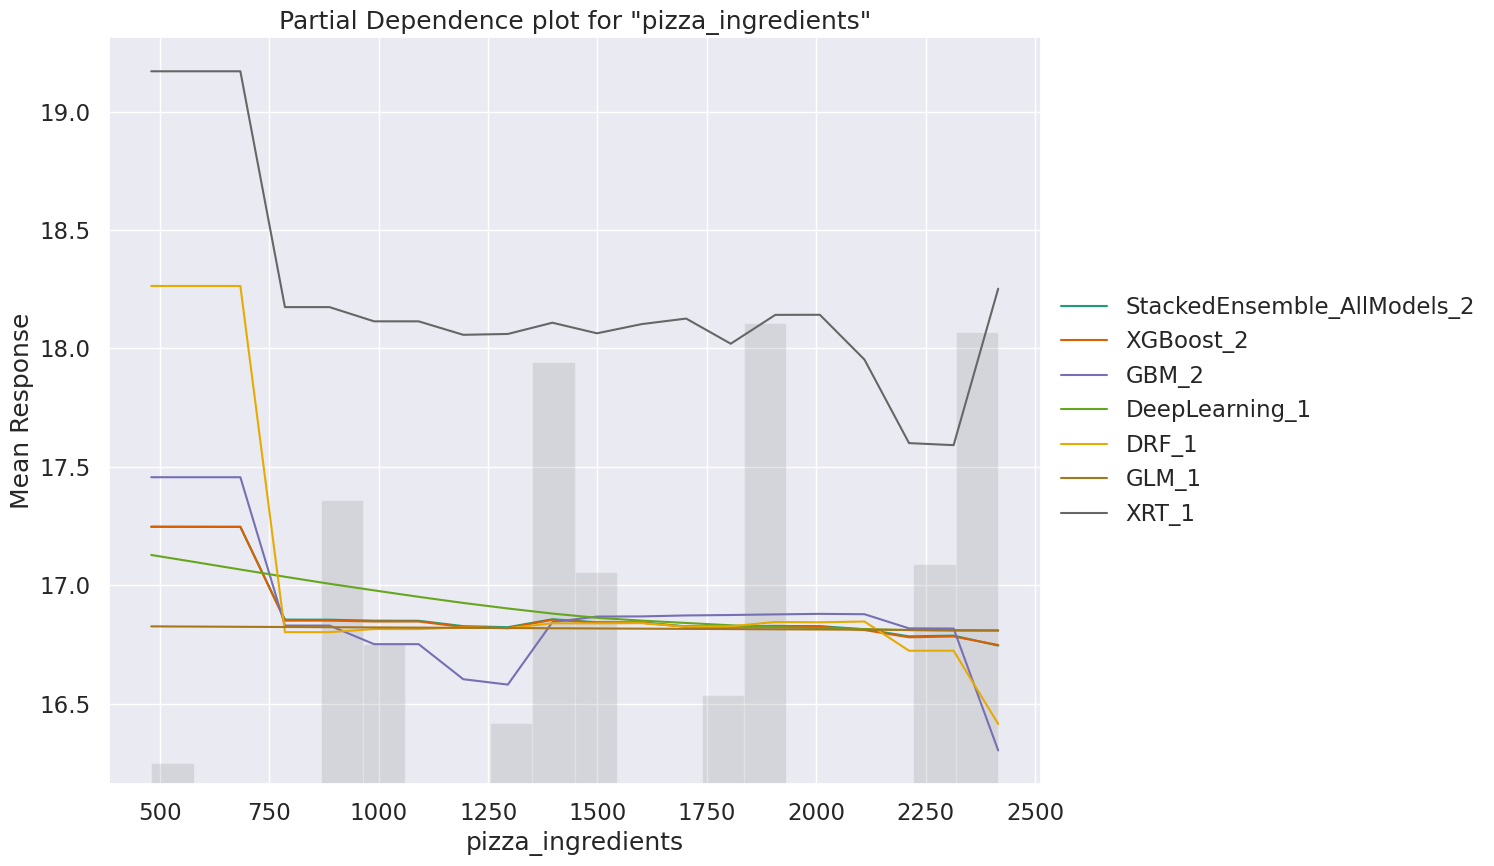

# Individual Conditional Expectation

> An Individual Conditional Expectation (ICE) plot gives a graphical depiction of the marginal effect of a variable on the response. ICE plots are similar to partial dependence plots (PDP); PDP shows the average effect of a feature while ICE plot shows the effect for a single instance. This function will plot the effect for each decile. In contrast to the PDP, ICE plots can provide more insight, especially when there is stronger feature interaction.

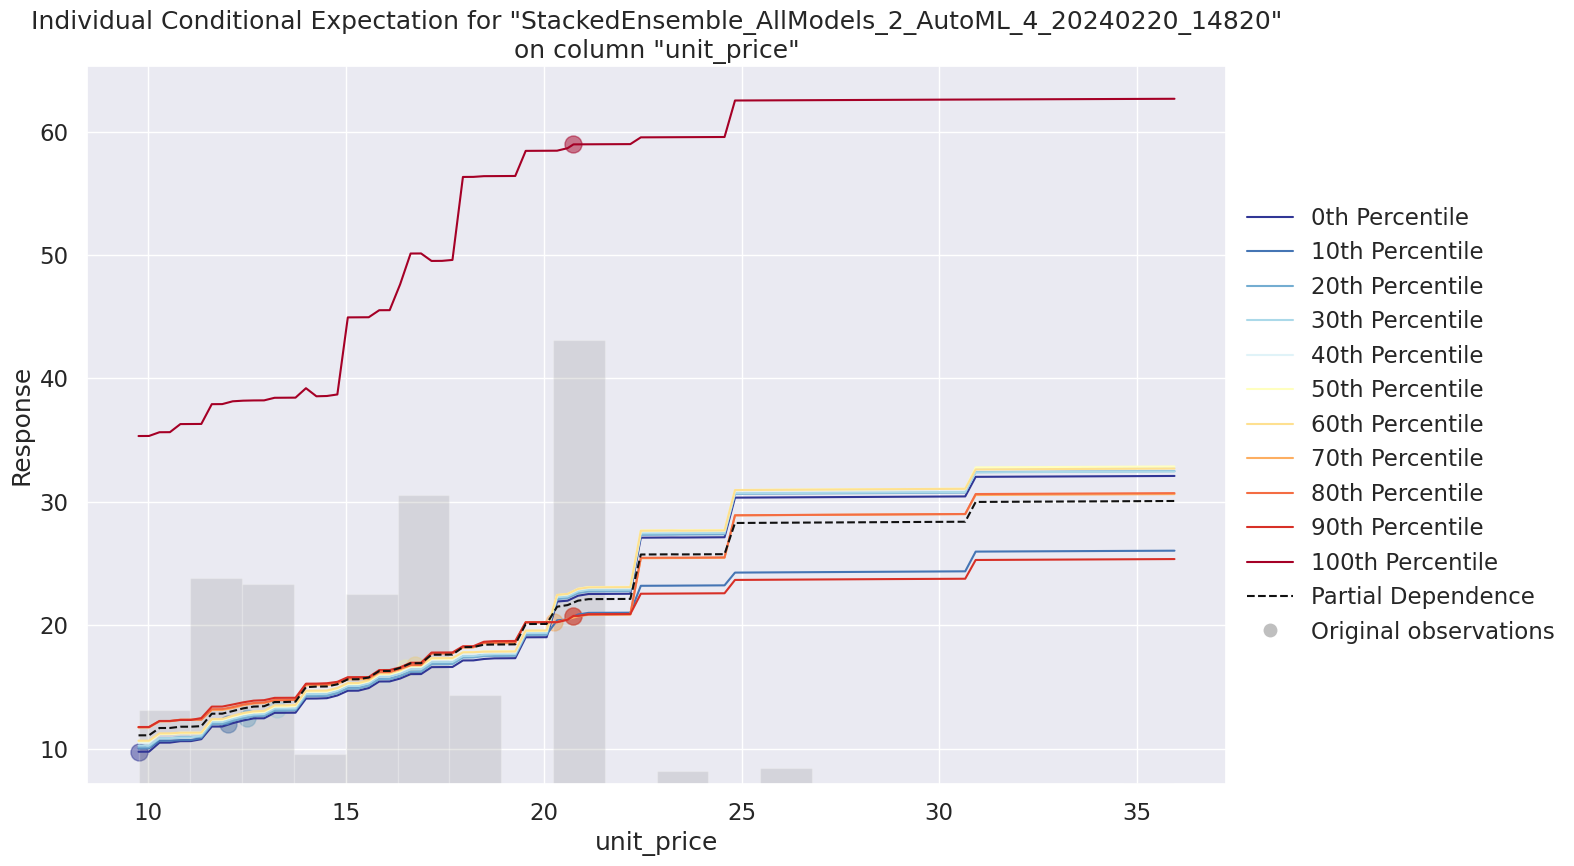

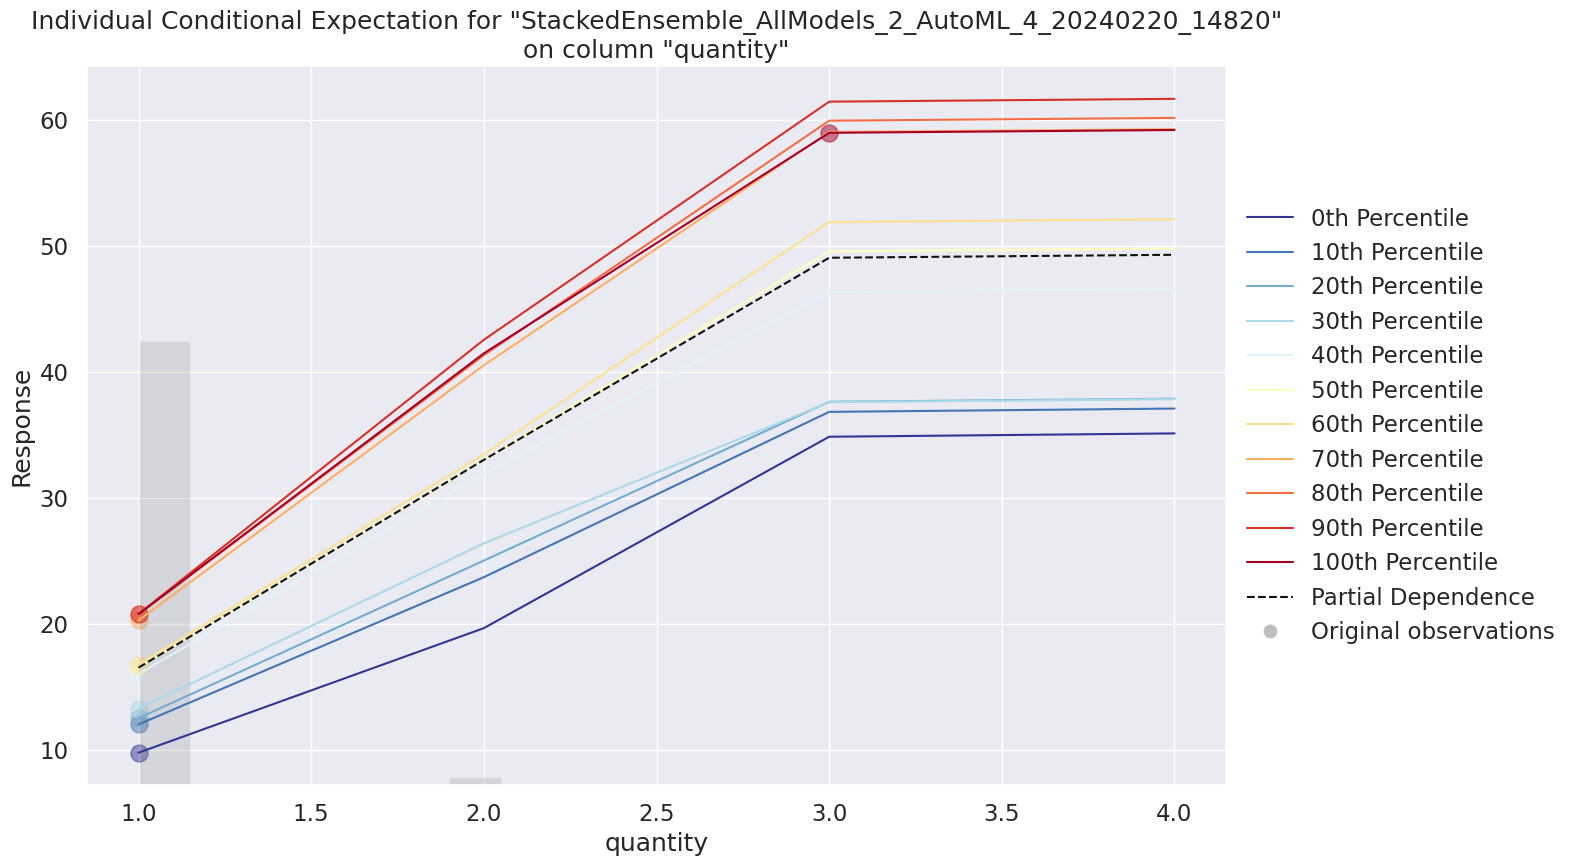

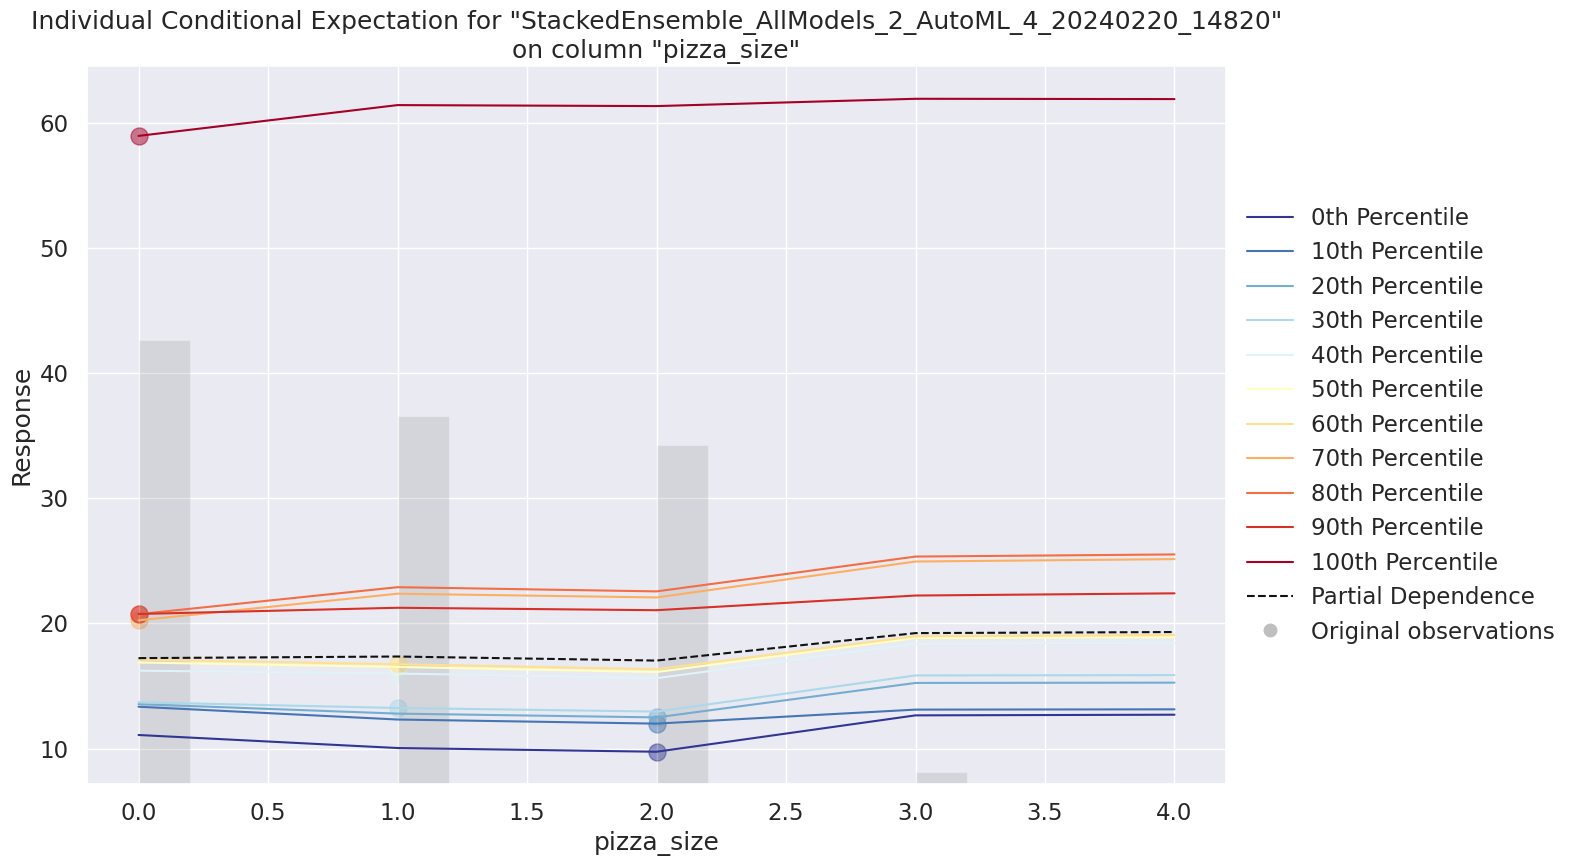

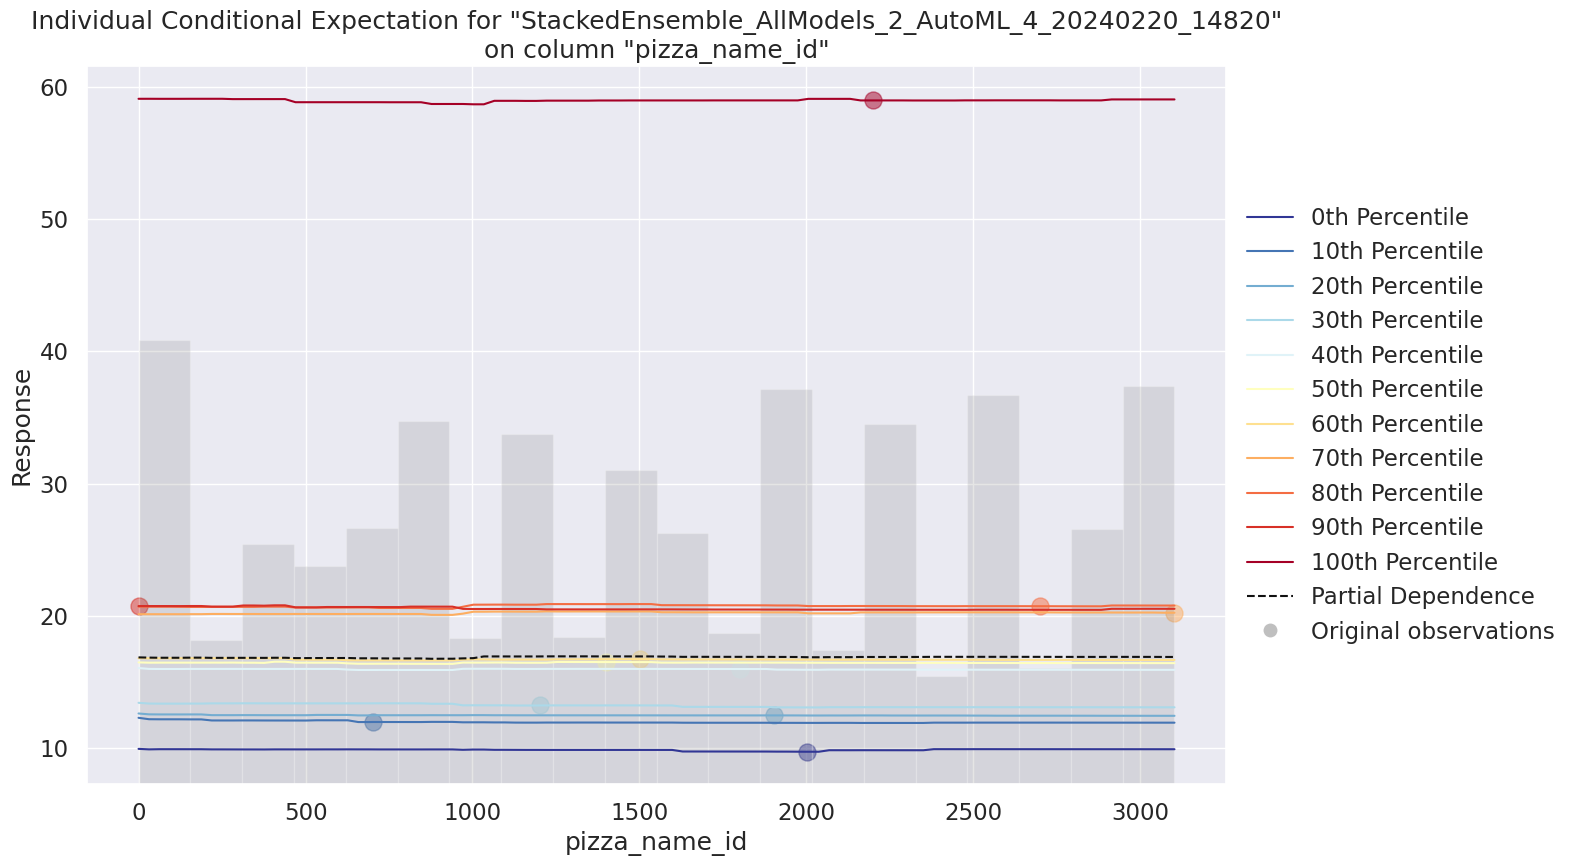

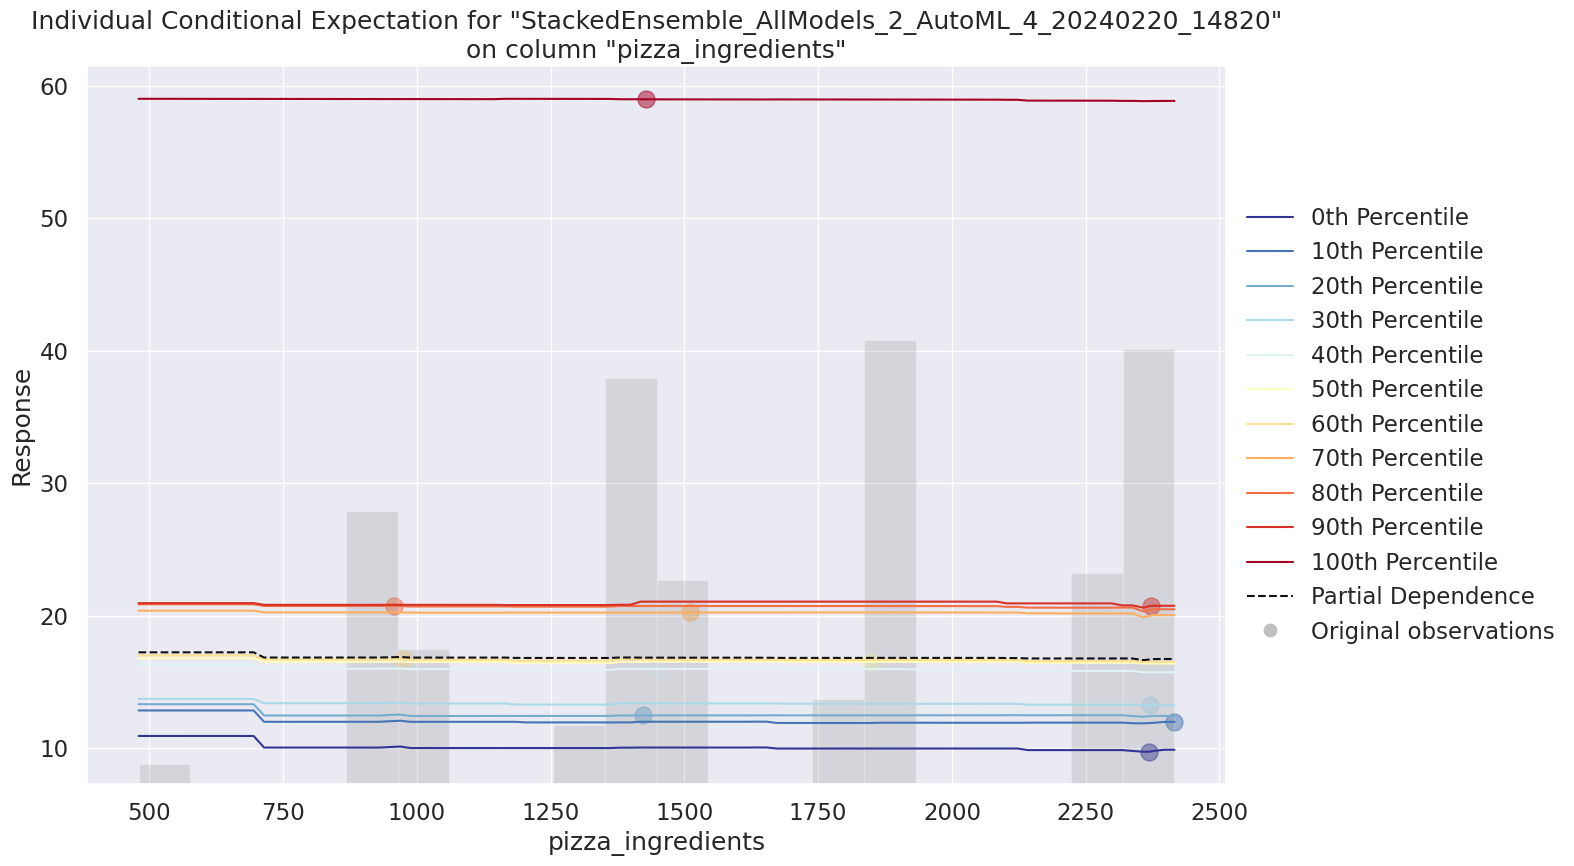

In [150]:
exa = aml.explain(df_test)

# **Answer the following questions for all of the models:**


* **Is the relationship significant?**
  
  Yes, the leaderboard indicates that the models have low RMSE scores, suggesting a significant relationship between the predictors and the target variable.

* **Are any model assumptions violated?**
  
  Yes, the use of cross-validation suggests an effort to prevent overfitting, which is in line with the assumptions necessary for a robust model. The high performance of the models on the leaderboard further implies that key assumptions are likely met.

* **Is there any multicollinearity in the model?**
  
  Yes, the application of Ridge and Lasso regularization techniques inherently addresses multicollinearity, likely reducing its presence in the model.

* **In the multivariate models are predictor variables independent of all the other predictor variables?**
  
  Yes, in the regularized models, the predictor variables are expected to exhibit increased independence due to the penalization effects of Ridge and Lasso.

* **In multivariate models rank the most significant predictor variables and exclude insignificant ones from the model.**
  
  Yes, Lasso regularization explicitly performs feature selection by shrinking the coefficients of less significant predictor variables to zero, effectively excluding them from the model.

* **Does the model make sense?**
  
  Yes, given the low RMSE scores on the leaderboard, the models appear to make sense for the data.

* **Does regularization help?**
  
  Yes, regularization tends to improve model generalization and thus helps with model performance.

* **Which independent variables are significant?**
  
  In the context of Lasso regularization, the variables with non-zero coefficients are considered significant.

* **Which hyperparameters are important?**
  
  The regularization parameter (alpha) and the lambda (penalty strength) are important hyperparameters in regularization.

# **Refrences**

1. AutoML: https://towardsdatascience.com/automated-machine-learning-with-h2o-258a2f3a203f

2. H2O: https://docs.h2o.ai/

3. Generalized Linear Models (GLM):

Hastie, T., Tibshirani, R., & Friedman, J. (2009). The Elements of Statistical Learning: Data Mining, Inference, and Prediction. Springer Series in Statistics.

4. Ridge and Lasso Regularization:

James, G., Witten, D., Hastie, T., & Tibshirani, R. (2013). An Introduction to Statistical Learning with Applications in R. Springer Texts in Statistics.

# **LICENSE**
MIT License

Copyright (c) 2024 sakshiraade

Permission is hereby granted, free of charge, to any person obtaining a copy of this software and associated documentation files (the "Software"), to deal in the Software without restriction, including without limitation the rights to use, copy, modify, merge, publish, distribute, sublicense, and/or sell copies of the Software, and to permit persons to whom the Software is furnished to do so, subject to the following conditions:

The above copyright notice and this permission notice shall be included in all copies or substantial portions of the Software.

THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY, FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM, OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN THE SOFTWARE.